In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from cswNets3 import *
from protoCSW import *

%matplotlib inline
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def mov_avrg(arr,smooth=30):
  """ calculates with sliding window average on array
  """
  L = []
  for idx in range(len(arr)-smooth):
    score = sum(arr[idx:idx+smooth])/smooth
    L.append(score)
  return np.array(L)

In [3]:
# setup
fix_vocab = 10
rand_vocab = 0
vocab_size = fix_vocab+rand_vocab

arch = {'input_seq_len':2,
       'output_seq_len':2,
        # must be multiple of 3
       'num_sequences': 3,
       'fix_vocab_size': fix_vocab,
       'rand_vocab_size': rand_vocab,
       'netdim': vocab_size/2}


In [4]:
# train
train_info = {'batch_size': 20,
              'num_epochs': 2000,
              'loss_op': tf.losses.mean_squared_error}

In [5]:
rnn = LSTMseq2(arch,saving=True)
rnn_exp_data = run_k_experiments(rnn,train_info,RAND=False,COND=False)

Instructions for updating:
Use the retry module or similar alternatives.
saving to savedmodels/LSTMseq2_05-09-08.37.16.866804/model-initial-05-09-08.37.16.866846
epoch 0.0 elapsed time 0:00:05.331545
epoch 0.01 elapsed time 0:00:00.219667
epoch 0.02 elapsed time 0:00:00.207289
epoch 0.03 elapsed time 0:00:00.217471
epoch 0.04 elapsed time 0:00:00.254671
epoch 0.05 elapsed time 0:00:00.246317
epoch 0.06 elapsed time 0:00:00.223119
epoch 0.07 elapsed time 0:00:00.217865
epoch 0.08 elapsed time 0:00:00.235871
epoch 0.09 elapsed time 0:00:00.218762
epoch 0.1 elapsed time 0:00:00.235797
epoch 0.11 elapsed time 0:00:00.228138
epoch 0.12 elapsed time 0:00:00.197771
epoch 0.13 elapsed time 0:00:00.241040
epoch 0.14 elapsed time 0:00:00.273732
epoch 0.15 elapsed time 0:00:00.251770
epoch 0.16 elapsed time 0:00:00.213825
epoch 0.17 elapsed time 0:00:00.211985
epoch 0.18 elapsed time 0:00:00.223491
epoch 0.19 elapsed time 0:00:00.228634
epoch 0.2 elapsed time 0:00:00.225522
epoch 0.21 elapsed tim

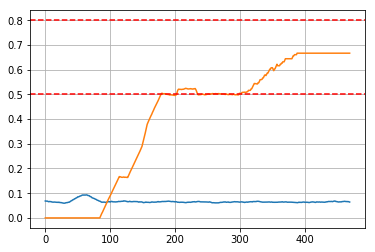

In [12]:
plt.plot(mov_avrg(rnn_exp_data[0,:,0]))
plt.plot(mov_avrg(rnn_exp_data[0,:,1]))
plt.axhline(.8,c='r',ls='--')
plt.axhline(.5,c='r',ls='--')
plt.grid(True)
# plt.ylim(.4,.65)

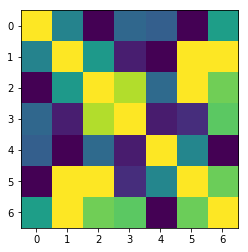

In [9]:
r_mat = np.corrcoef(rnn.sess.run(rnn.embed_mat))[:7,:7]
plt.imshow(r_mat,vmin=-.5,vmax=.5)
# plt.grid(True)

In [10]:
def eval2(net,X_data,Y_data,sess=None):
    """ makes predictions and computes loss """
    sess = net.sess
    # feed dictionary
#     eval_data_dict = gen_data_dict(100,RAND,COND)
    eval_feed_dict = {net.xph:X_data, 
                      net.yph:Y_data, 
                      net.batch_size_ph:1}
    # initialize iterator with eval data
    sess.run(net.itr_initop,eval_feed_dict)
    # compute loss and predictions
    filler_acc_L = []
    state_acc_L = []
    while True:
      try:
        (state_acc,filler_acc),yhat = sess.run([net.acc_op,net.y_hat_ids],eval_feed_dict)
#         return yhat
        print(state_acc,filler_acc,yhat)
        # print(state_acc,filler_acc)
        state_acc_L.append(state_acc)
        filler_acc_L.append(filler_acc)
      except tf.errors.OutOfRangeError:
        break
    acc_arr = np.vstack([state_acc_L,filler_acc_L]).transpose()
    mean_acc = np.mean(acc_arr,0)
    return mean_acc

In [11]:
# 1 3 5
X_data = [[1,9,3,9,5,9]]
Y_data = [[3,9,5,9,7,9]]
yhat = eval2(rnn,X_data,Y_data)

0.0 0.6666667 [9 9 9 0 9 9]


In [ ]:
yhat